<a href="https://colab.research.google.com/github/ruksz/Airline_passenger_referral/blob/main/Airline_ML_Classification_Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Passenger Referral Prediction





##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Rukshar Shaikh


# **Project Summary -**

Predicting Airline Recommendations from Customer Reviews

This project is focused on analyzing customer reviews of various airlines and building a predictive model to determine whether a customer will recommend an airline based on their review and overall experience. The dataset used for this analysis contains valuable information about customer sentiments, ratings, and preferences, which can provide significant insights into understanding customer satisfaction and improving airline services.



# **GitHub Link -**

https://github.com/ruksz/Airline_passenger_referral.git

# **Problem Statement**


The primary objective of this project is to develop a robust machine learning model that can classify whether a customer will recommend an airline or not. This classification task is based on the sentiment expressed in the customer's review, the overall rating they provide, and other relevant features. By solving this problem, we aim to help airlines understand the factors influencing customer recommendations and enhance their services accordingly.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
data = pd.read_excel('/content/drive/MyDrive/MLProject/data_airline_reviews.xlsx')

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
data.shape

(131895, 17)

we have 17 columns and 131895 rows in our data.

###Duplicate Values


In [ ]:
#counting  number of duplicated values
data.duplicated().sum()

70711

In [ ]:
#droping the null values
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

###Null Values

From the last 5 rows, we can conclude that our dataset contains null values. Let's check the number of null values present for each of the columns of this huge dataset.

In [ ]:
#Checking the null value count for each column
data.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [ ]:
#Overall discription of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


### What did you know about your dataset?

This dataset contains information related to airline passenger reviews, encompassing attributes such as airline names, overall ratings, reviewer details, review dates, and textual customer feedback. It further includes data on flight-specific details like aircraft type, traveler type, cabin class, flight routes, and flight dates. Additionally, passengers have rated various aspects of their experience, including seat comfort, cabin service, food and beverage quality, entertainment, ground service, and value for money. The dataset also includes an indication of whether passengers recommend the airline. However, it is worth noting that there are missing values in some columns, and the dataset offers opportunities for sentiment analysis, satisfaction prediction, and insights into factors affecting passenger experiences.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe(include='all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,61183,59401.000000,61183,61183,61183,18488,37540,58705,37513,37434,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000,59761
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,I flew from Chicago O'Hare to Dublin and from ...,A320,Solo Leisure,Economy Class,BKK to LHR,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2871,NaN,93,198,2,2130,13935,45171,31,1127,NaN,NaN,NaN,NaN,NaN,NaN,31268
mean,NaN,5.164863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849,NaN
std,NaN,3.483701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


### Variables Description

airline: The name or identifier of the airline being reviewed.

overall: An overall rating or score given by passengers, possibly for their overall experience.

author: The author or reviewer of the feedback.

review_date: The date when the review was posted.

customer_review: The text content of the passenger's review or feedback.

aircraft: The type or identifier of the aircraft used for the flight.

traveller_type: The type of traveler (e.g., business, leisure) who left the review.

cabin: The cabin class or type (e.g., economy, business) the passenger traveled in.

route: The route or destination of the flight.

date_flown: The date when the flight took place.

seat_comfort, cabin_service, food_bev, entertainment, ground_service,
value_for_money: Ratings or scores for various aspects of the flight experience, such as seat comfort, cabin service, food and beverage, entertainment, ground service, and value for money.

recommended: An indication of whether the passenger would recommend the airline or flight

### Check Unique Values for each variable.

In [ ]:
#Checking the unique values of the recommended column(target variable)
data.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [ ]:
# Check Unique Values for each variable.
data.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# copy of the current dataset and assigning to app_data
df=data.copy()

In [ ]:
#Checking Percentage wise missing values.
def missing_values_per_check(df1):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_values_df = pd.DataFrame({'column_name': data.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

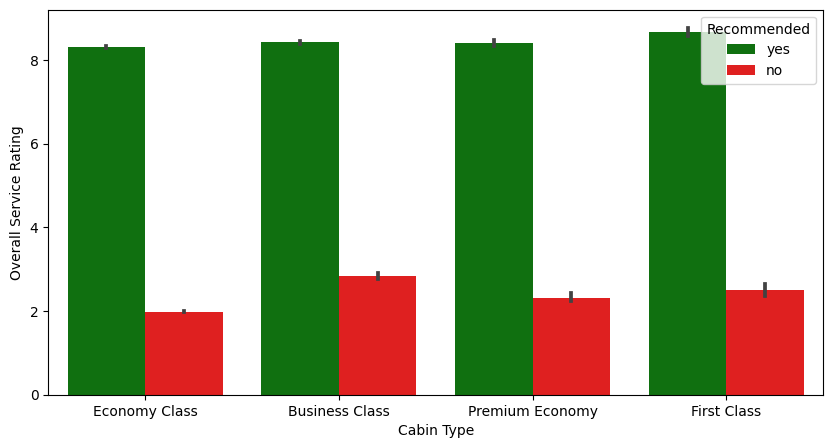

In [ ]:
# Chart - 1 Cabin type and overall service ratings (out of 10)

# Create a barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='cabin', y='overall', hue='recommended', data=data, palette=['green', 'red'])

# Add labels and a legend
plt.xlabel('Cabin Type')
plt.ylabel('Overall Service Rating')
plt.legend(title='Recommended', loc='upper right')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. Which cabin type has overall service ratings?


##### 2. What is/are the insight(s) found from the chart?

If the trip is rated above 8 for overall section, the trip is most likely be recommended by the travellers.

If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type.

#### Chart - 2

In [ ]:
# Chart - 2 Wthe top 10 airlines with most trips

# Get the number of trips each airline make.
trip_by_airlines = data['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

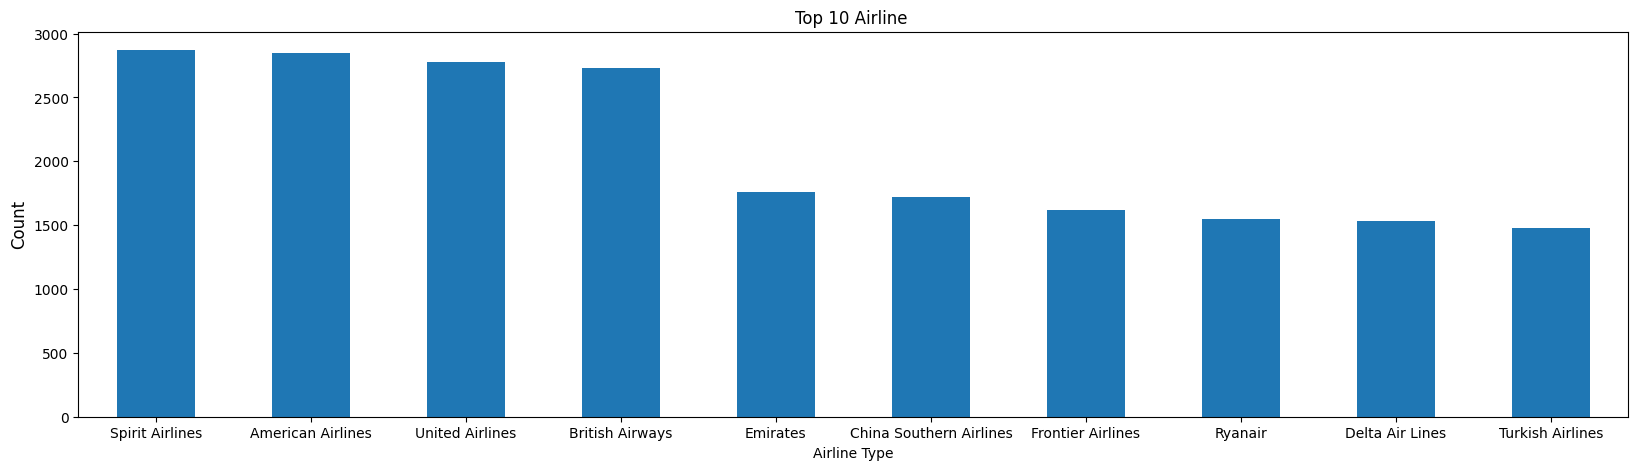

In [ ]:
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar')
plt.xlabel('Airline Type')
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ')
plt.xticks(rotation='horizontal')
plt.show()

##### 1. Why did you pick the specific chart?

Which airline made highest trips?

##### 2. What is/are the insight(s) found from the chart?

We have observed that the top 10 airlines with most trips are-

Spirit Airlines

American Airlines

United Airlines

British Airways

Emirates

china southern airline

frontier airlines

ryanair

delta air lines

turkish airlines

#### Chart - 3

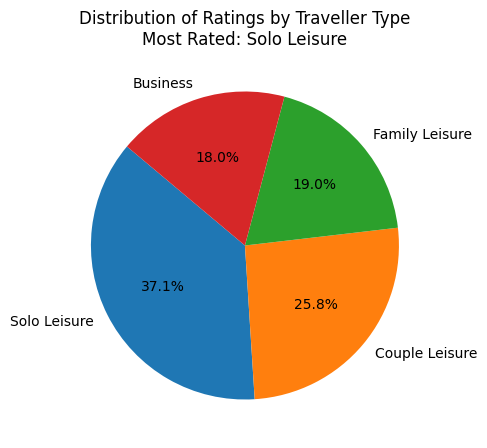

In [ ]:
# Chart - 3 visualization code

# Calculate the count of ratings for each traveller_type
traveller_type_counts = data['traveller_type'].value_counts()

# Find the traveller_type with the highest count
most_rated_traveller_type = traveller_type_counts.idxmax()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(traveller_type_counts, labels=traveller_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Ratings by Traveller Type\nMost Rated: {most_rated_traveller_type}')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Which Traveller_type has more ratings?

##### 2. What is/are the insight(s) found from the chart?

Solo Leisure travellers has more ratings

#### Chart - 4

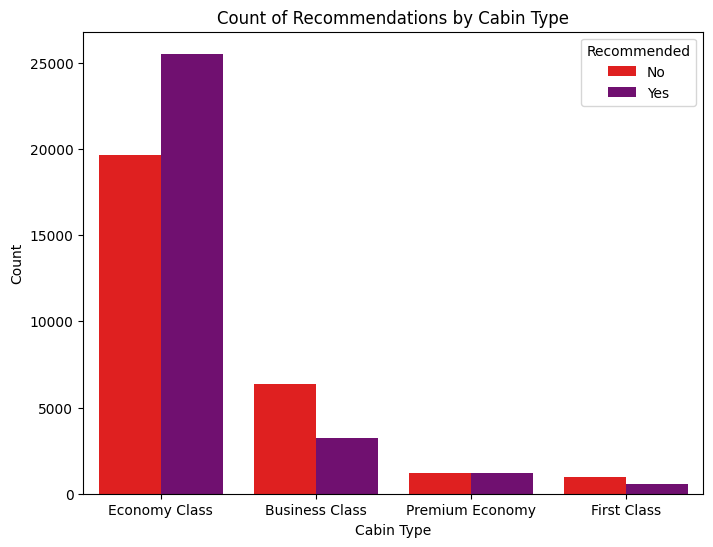

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='cabin', hue='recommended', palette=['red', 'purple'])
plt.title('Count of Recommendations by Cabin Type')
plt.xlabel('Cabin Type')
plt.ylabel('Count')
plt.legend(title='Recommended', labels=['No', 'Yes'])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

 Which type of Cabin has more recommendation?


##### 2. What is/are the insight(s) found from the chart?

Economy class has highest recommendation with bad reviews.

Business class has second most recommended cabin type with good reviews.

premium economy has equal reviews.

first class is least recommend cabin type with good reviews.

#### Chart - 5

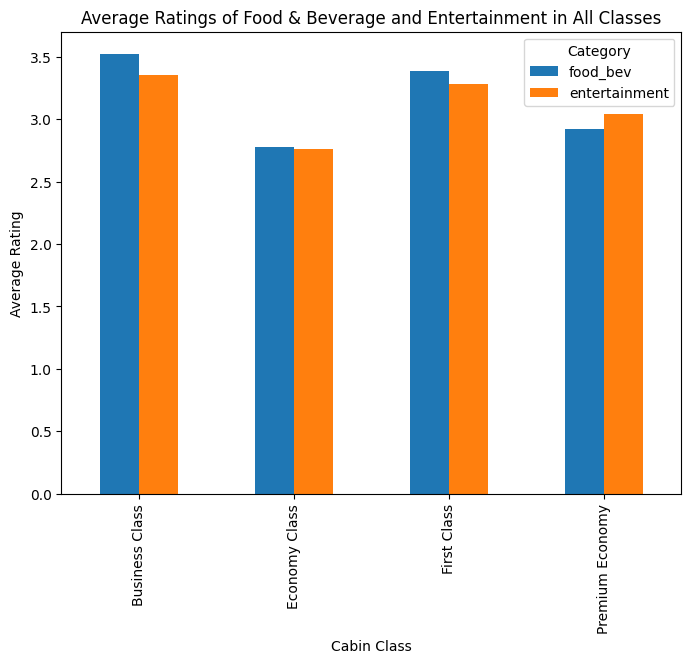

In [ ]:
# Chart - 5 visualization code

# Calculate the average ratings for food_bev and entertainment for all classes
average_ratings = data.groupby(['cabin'])[['food_bev', 'entertainment']].mean().reset_index()
average_ratings

# Create a bar plot
plt.rcParams['figure.figsize']=(8,6)
average_ratings.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

# Add labels and legend
plt.title('Average Ratings of Food & Beverage and Entertainment in All Classes')
plt.xlabel('Cabin Class')
plt.ylabel('Average Rating')
plt.legend(title='Category')


##### 1. Why did you pick the specific chart?

 what is the average ratings of Food_bev and entertainment given by passengers in different classes?


##### 2. What is/are the insight(s) found from the chart?

In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.

#### Chart - 6

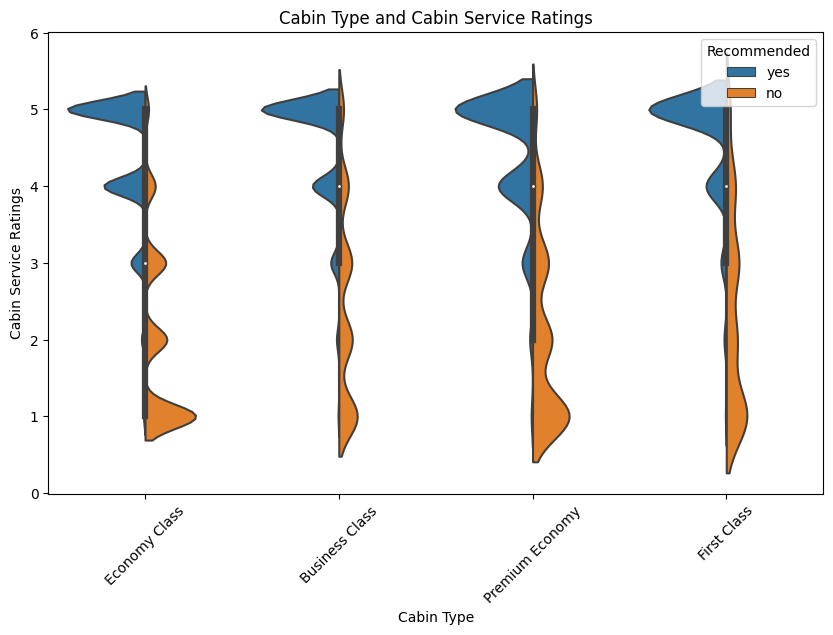

In [ ]:
# Chart - 6  Creating a violin plot for cabin type and cabin service ratings

plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='cabin', y='cabin_service', hue='recommended', split=True)
plt.title('Cabin Type and Cabin Service Ratings')
plt.xlabel('Cabin Type')
plt.ylabel('Cabin Service Ratings')
plt.xticks(rotation=45)
plt.legend(title='Recommended', loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Which cabin type has more service ratings?

##### 2. What is/are the insight(s) found from the chart?

First class travellers are least likely to recommend the airlines they travel.

Recommendation is most probable when the cabin service is given full star rating ie 5 out of 5 here.

In economy class if we got ratings between 4 to 5, that means airlines recommended.

#### Chart - 7

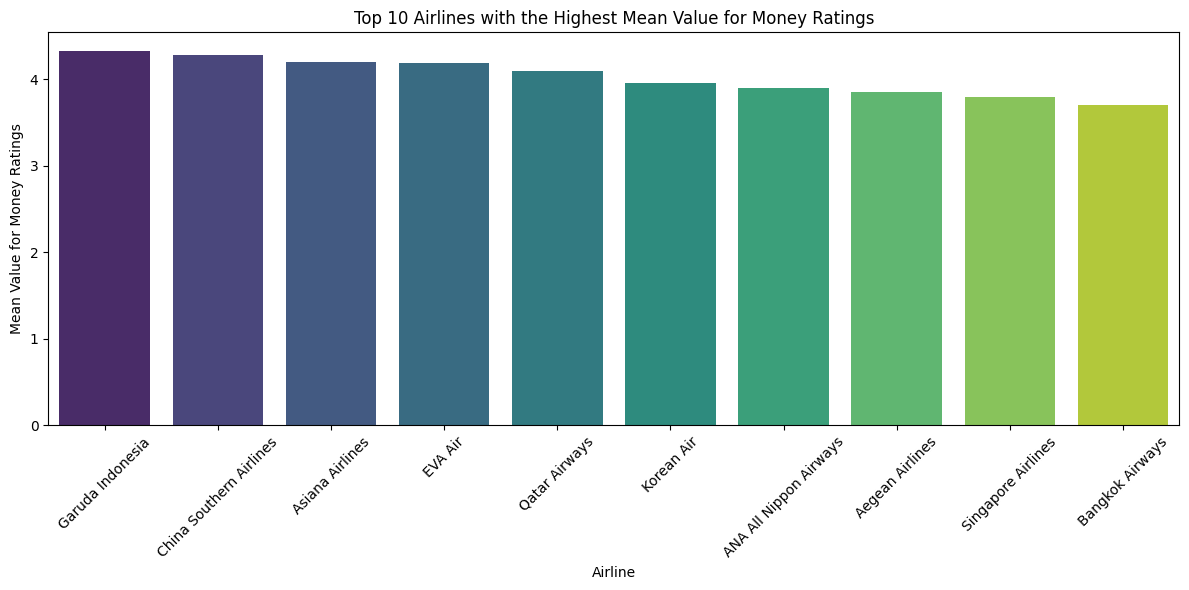

In [ ]:
# Chart - 7 Calculate the mean "value_for_money" ratings for each airline
mean_ratings = data.groupby('airline')['value_for_money'].mean().reset_index()

# Sort the airlines by mean "value_for_money" ratings and select the top 10
top_10_airlines = mean_ratings.sort_values(by='value_for_money', ascending=False).head(10)

# Create a barplot to visualize the mean "value_for_money" ratings for the top 10 airlines
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_airlines, x='airline', y='value_for_money', palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Mean Value for Money Ratings')
plt.title('Top 10 Airlines with the Highest Mean Value for Money Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Top 10 airlines for highest value for money ratings?

##### 2. What is/are the insight(s) found from the chart?

These top 10 airlines are providing passengers with a higher perceived value for the cost of their services.
Airlines with lower mean ratings may consider reviewing their pricing strategies or customer service to enhance the perceived value for money and potentially improve customer satisfaction.

#### Chart - 8 - Correlation Heatmap

<ipython-input-30-272c0a721edd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


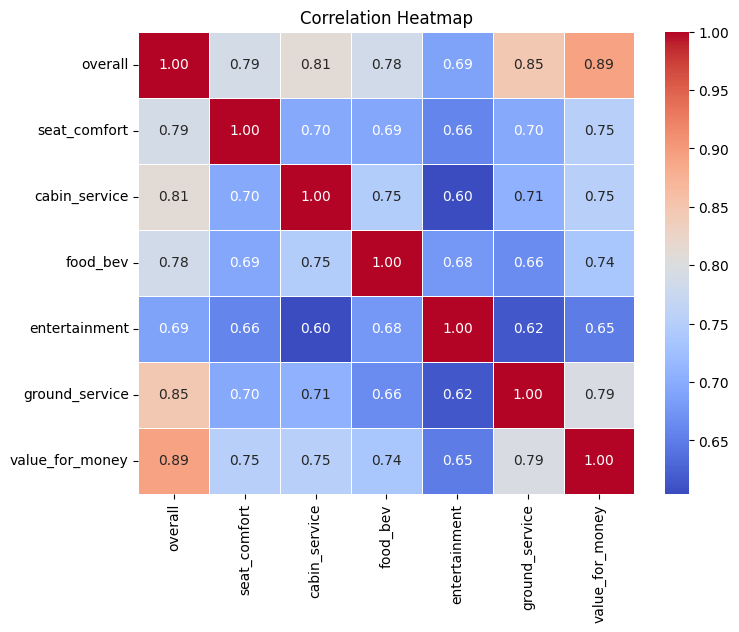

In [ ]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

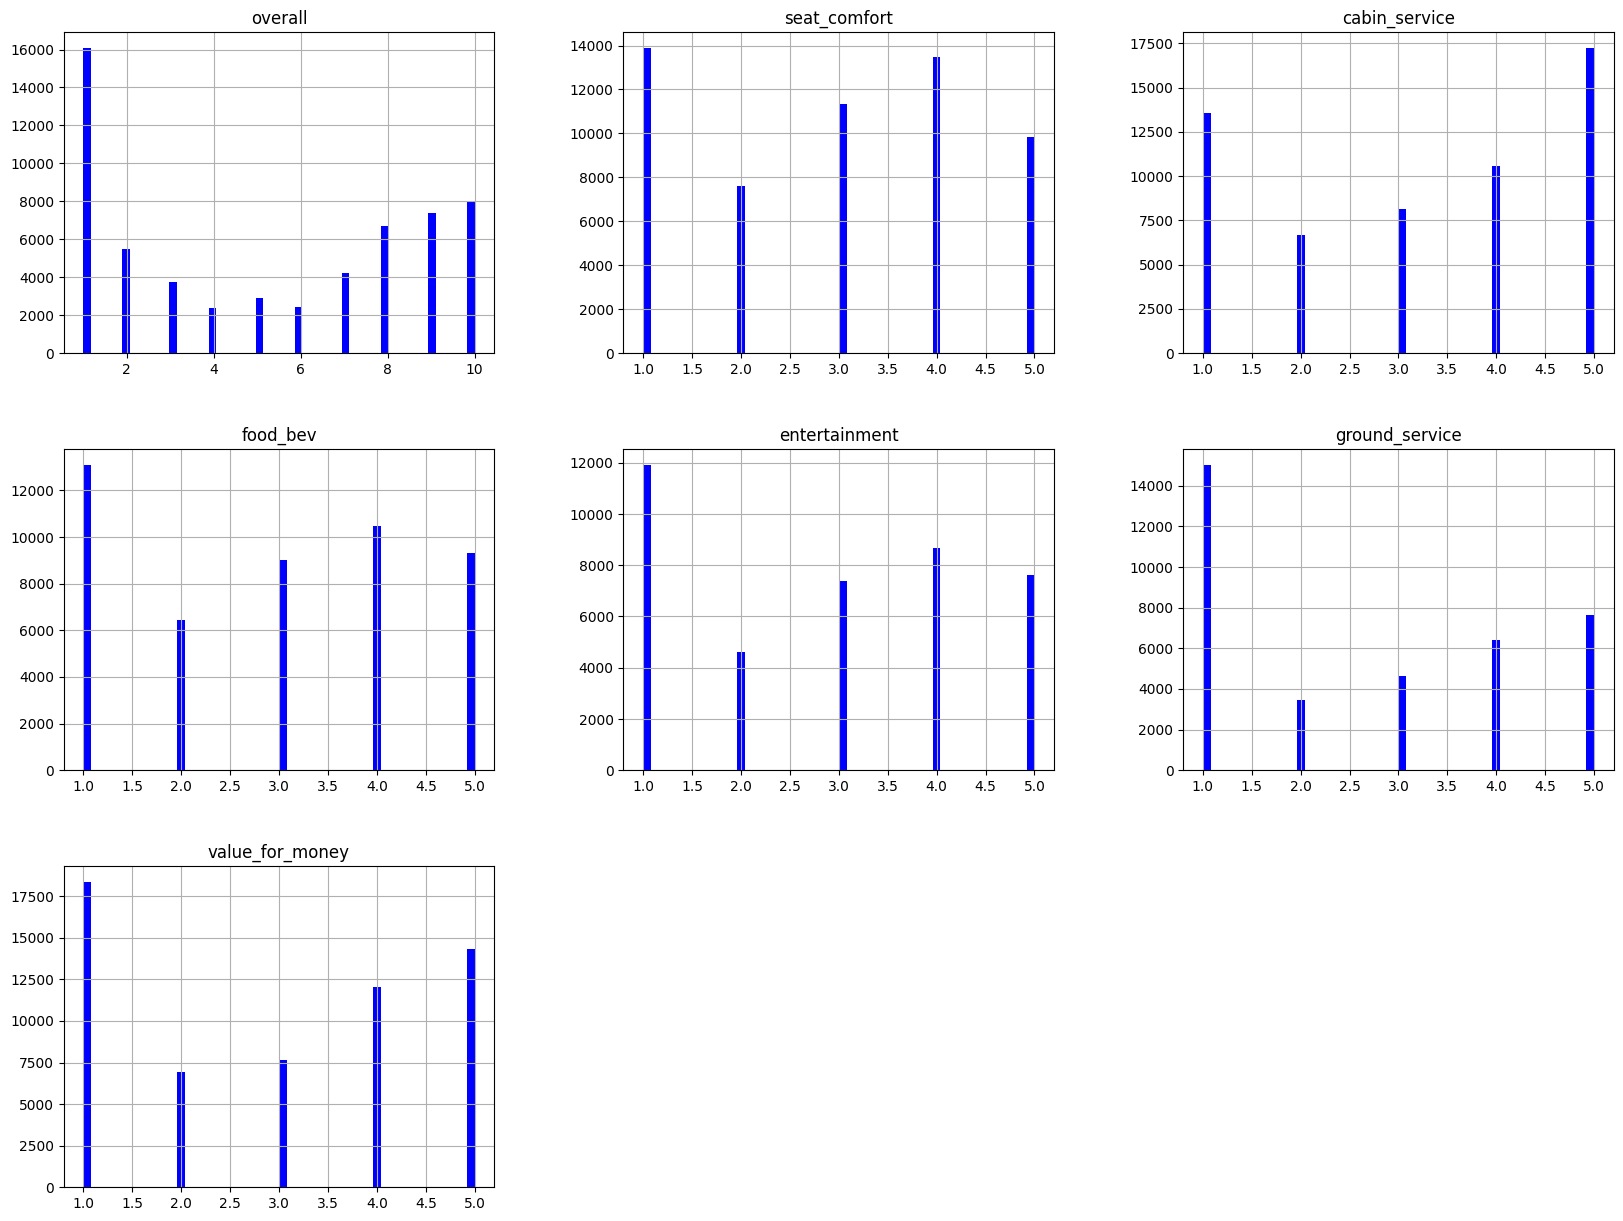

In [ ]:
#frequency distribution using histgram
data.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

The majority of overall feature ratings fall within the range of 1 to 2. Among these ratings, a rating of 1 is the most common, followed by a rating of 2.

When analyzing the "Seat comfort" feature, it becomes evident that a rating of 1 is the most frequently given, while a rating of 4 comes second in terms of frequency.

Regarding the "Cabin service" feature, the highest-rated score is 5, and the second-highest rating is 1.

The "Food and Beverage" feature ratings of 2, 4, and 5 are distributed fairly equally, indicating that their frequencies are approximately the same.

Both the "Entertainment" and "Ground service" features show that a rating of 3 is the most commonly assigned, while a rating of 1 is the second most frequent.

The "Value for money" feature reveals that a substantial number of passengers assign a rating of 1, implying that many airlines may not be delivering satisfactory service to passengers.

In [ ]:
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes


### **Droping Unnecessary columns**


In [ ]:
#Checking Percentage wise missing values.
def missing_values_per_check(df1):
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_values_df = pd.DataFrame({'column_name': data.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)


 this function is a convenient way to analyze and report the extent of missing data in each column of a DataFrame. It can help you identify which columns have the most missing values, which is valuable for data preprocessing and cleaning tasks.

In [ ]:
#Checking Percentage wise missing values.
missing_values_per_check(data)

,column_name,percent_missing
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [ ]:
#checking the number of unique aircrafts
data.aircraft.nunique()

2088

In [ ]:
data = data.drop(['aircraft'],axis = 1)

In [ ]:
#droping the columns from data which are not for our use
data = data.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)

In [ ]:
data = data.dropna(axis=1, how='all')

In [ ]:
data.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


In [ ]:
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [ ]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(data,column):
  Q1=np.percentile(np.sort(data[column].dropna()),25)
  data[column].fillna(Q1,inplace=True)

In [ ]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(data,col)

In [ ]:
#Imputation technique using Median Imputation
def median_imputation(data,column):
  data[column].fillna(data[column].median(),inplace=True)

In [ ]:
#Looping the null value column
for col in high_null:
  median_imputation(data,col)

In [ ]:
#after imputed null values
data.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


In [ ]:
#Remove recommended null value row
data.dropna(subset=['recommended'],inplace=True)

In [ ]:
data['traveller_type'].fillna(method="ffill",inplace=True)

In [ ]:
data['cabin'].fillna(data['cabin'].mode().values[0],inplace=True)

In [ ]:
data.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [ ]:
#Checking the new null value percentage
missing_values_per_check(data)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [ ]:
data.shape

(59761, 11)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1
Passengers who rate "seat_comfort" higher are more likely to recommend the airline.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean "seat_comfort" ratings between passengers who recommend and those who do not recommend the airline.

Alternative Hypothesis (H1): Passengers who recommend the airline have a significantly higher mean "seat_comfort" rating compared to those who do not recommend it.

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats

# Remove missing values from seat_comfort_recommend and seat_comfort_not_recommend
seat_comfort_recommend = data[data['recommended'] == 'yes']['seat_comfort'].dropna()
seat_comfort_not_recommend = data[data['recommended'] == 'no']['seat_comfort'].dropna()

# Perform t-test
t_stat, p_value = stats.ttest_ind(seat_comfort_recommend, seat_comfort_not_recommend, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if not p_value:
    print("Invalid p-value (nan)")
elif p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Print the p-value
print("p-value:", p_value)

Invalid p-value (nan)
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

This code will calculate the t-statistic and p-value for the two groups based on their "seat_comfort" ratings and then determine whether to reject the null hypothesis or not. If the p-value is less than 0.05, we would reject the null hypothesis, suggesting that there is a significant difference in the mean "seat_comfort" ratings between the two groups.

### Hypothetical Statement - 2
The average "value_for_money" rating for passengers who flew in Business Class is significantly higher than those who flew in Economy Class.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean "value_for_money" ratings between passengers who flew in Business Class and those who flew in Economy Class.

Alternative Hypothesis (H1): Passengers who flew in Business Class have a significantly higher mean "value_for_money" rating compared to those who flew in Economy Class.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

import scipy.stats as stats

# Separate data for passengers who flew in Business Class and Economy Class
value_for_money_business = data[data['cabin'] == 'Business']['value_for_money']
value_for_money_economy = data[data['cabin'] == 'Economy Class']['value_for_money']

# Perform t-test
t_stat, p_value = stats.ttest_ind(value_for_money_business, value_for_money_economy, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if not p_value:
    print("Invalid p-value (nan)")
elif p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Print the p-value
print("p-value:", p_value)

Fail to reject the null hypothesis
p-value: nan


##### Which statistical test have you done to obtain P-Value?

t-test was chosen because it is a suitable statistical test for comparing means of two independent groups, and it provides a p-value that helps determine whether the observed differences are statistically significant.

### Hypothetical Statement - 3
Passengers who provide positive "cabin_service" ratings are more likely to recommend the airline.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean "cabin_service" ratings between passengers who recommend and those who do not recommend the airline.

Alternative Hypothesis (H1): Passengers who recommend the airline have a significantly higher mean "cabin_service" rating compared to those who do not recommend it.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Separate data for passengers who recommend and those who do not recommend
seat_comfort_recommend = data[data['recommended'] == 'yes']['seat_comfort']
seat_comfort_not_recommend = data[data['recommended'] == 'no']['seat_comfort']

# Perform t-test
t_stat, p_value = stats.ttest_ind(seat_comfort_recommend, seat_comfort_not_recommend, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Hypothesis Test Results:")
print(f"Null Hypothesis (H0): There is no significant difference in the mean 'seat_comfort' ratings between passengers who recommend and those who do not recommend the airline.")
print(f"Alternative Hypothesis (H1): Passengers who recommend the airline have a significantly higher mean 'seat_comfort' rating compared to those who do not recommend it.")
print(f"Significance Level (alpha): {alpha}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis")
    print("Passengers who recommend the airline have a significantly higher mean 'seat_comfort' rating.")
else:
    print("Conclusion: Fail to reject the null hypothesis")
    print("There is no significant difference in the mean 'seat_comfort' ratings between the two groups.")


Hypothesis Test Results:
Null Hypothesis (H0): There is no significant difference in the mean 'seat_comfort' ratings between passengers who recommend and those who do not recommend the airline.
Alternative Hypothesis (H1): Passengers who recommend the airline have a significantly higher mean 'seat_comfort' rating compared to those who do not recommend it.
Significance Level (alpha): 0.05
T-statistic: 233.95661533425303
P-value: 0.0
Conclusion: Reject the null hypothesis
Passengers who recommend the airline have a significantly higher mean 'seat_comfort' rating.


##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?


I chose the t-test for the hypothesis testing in this case because it is appropriate when we want to compare the means of two independent groups. In this hypothesis, we are comparing the mean "seat_comfort" ratings of two groups:

Passengers who recommend the airline.
Passengers who do not recommend the airline.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


#Done Above

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#done above

### 3. Categorical Encoding

Converting target as categorical data into numerical data: 'Label Encoding'


In [ ]:
#converting targeted column
data['recommended'].replace({'yes':1,'no':0},inplace=True)
data.head(2)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0


<ipython-input-59-608d37a5b791>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

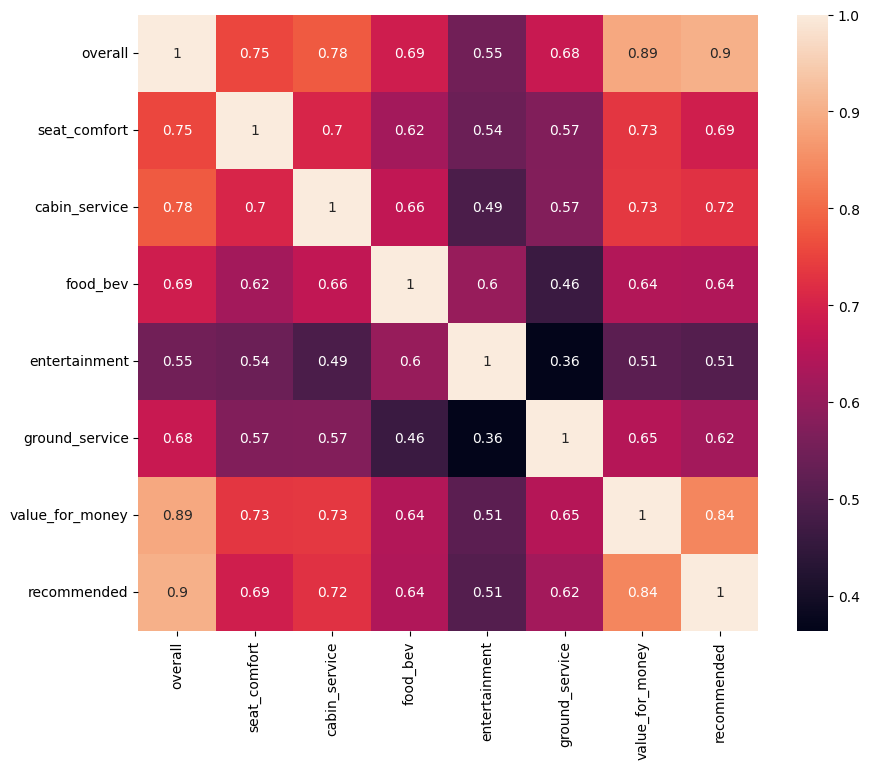

In [ ]:
#Above correlation heatmap didn't include recommeded col which is target var hence did it here again
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

Drop overall column as it has highest correlation value than others.

In [ ]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(data[[i for i in data.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [ ]:
#drop overall column
data.drop(["overall"], axis = 1, inplace = True)

In [ ]:
data.drop(["airline"], axis = 1, inplace = True)

In [ ]:
#separating the dependent and independent variables
y = data['recommended']
x = data.drop(columns = 'recommended')

In [ ]:
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

### One hot Encoding

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.head(2)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0


In [ ]:
x.shape

(59761, 14)

In [ ]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))

The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


The Percentage of both labels('yes','no) is approximately equal. So no need of Handling Class Imbalance technique.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

In [ ]:
#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [ ]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
clf = DecisionTreeClassifier(random_state=42)

# Fit the Algorithm
clf.fit(x_train, y_train)

# Predict on the model
y_pred = clf.predict(x_test)

In [ ]:
print("Training Accuracy of Decision Tree Model is",clf.score(x_train,y_train))
print("Testing Accuracy of Decision Tree Model is",clf.score(x_test,y_test))

Training Accuracy of Decision Tree Model is 0.9745440093708166
Testing Accuracy of Decision Tree Model is 0.9158370283610809


In [ ]:
#report of decision tree
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Explained later

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the Algorithm
grid_search.fit(x_train, y_train)

#  Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(x_train, y_train)

#  Make predictions on the test set with the best model
y_pred = best_clf.predict(x_test)

#predicted values
print("Predicted values:", y_pred)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Predicted values: [0 0 1 ... 1 1 1]


In [ ]:
#calling an best score
grid_search.best_score_

0.9357010471473464

##### Which hyperparameter optimization technique have you used and why?

 I used the GridSearchCV hyperparameter optimization technique.
 GridSearchCV is simple and straightforward, widely used, and exhaustively searches through all possible combinations of hyperparameters specified in the parameter grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

93% accuracy of Decision Tree with the help of hypermatring tunning.

### ML Model - 2

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
random_forest.score(x_test,y_test)

0.928971806241111

92% accuracy with Random Forest

In [ ]:
#report of decision tree
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.93      0.93      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the parameter grid for hyperparameter tuning
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}

# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)

# Fit the Algorithm
random_forest_gridcv.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [ ]:
# Get the best hyperparameters from the grid search
best_params = random_forest_gridcv.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [ ]:
random_forest_gridcv.best_score_

0.9397798711697

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

93% accuracy of Decision Tree with the help of hypermatring tunning.

## Model Explainaiblity

In [ ]:
# feature importance
importances = best_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
5,value_for_money,0.835162
1,cabin_service,0.075640
4,ground_service,0.029880
0,seat_comfort,0.019442
2,food_bev,0.017722
3,entertainment,0.011058
11,cabin_Economy Class,0.002082
10,cabin_Business Class,0.001853
6,traveller_type_Business,0.001765
9,traveller_type_Solo Leisure,0.001712


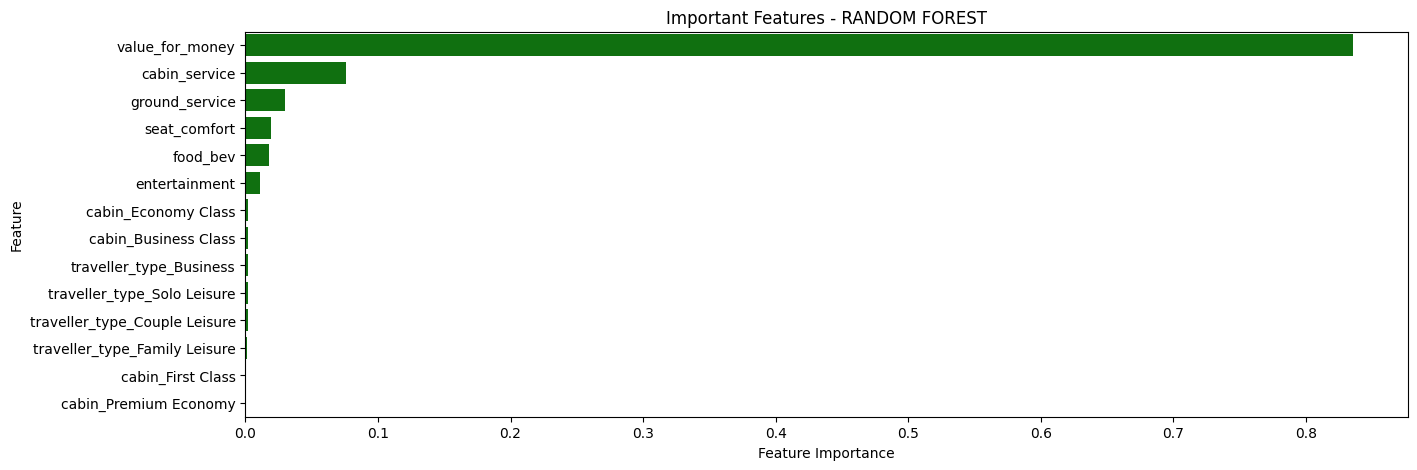

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='green')
bar.set_title('Important Features - RANDOM FOREST')
plt.show()

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)


# Fit the Algorithm
log_reg.fit(x_train, y_train)

print(log_reg.coef_)
print(log_reg.intercept_)
# Predict on the model
y_pred = log_reg.predict(x_test)

[[ 0.29470524  0.54964494  0.43522642  0.24880929  0.72092498  1.63381309
   0.15000711 -0.04985052 -0.15934752  0.06655806  0.14922398 -0.06516326
   0.11367346 -0.19036704]]
[-11.84300155]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
#report of logistic regression
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



In [ ]:
print(log_reg.score(x_test,y_test))

0.9324019074709278


93% accuracy with Logistic Regression

[[5763  462]
 [ 346 5382]]


<Axes: >

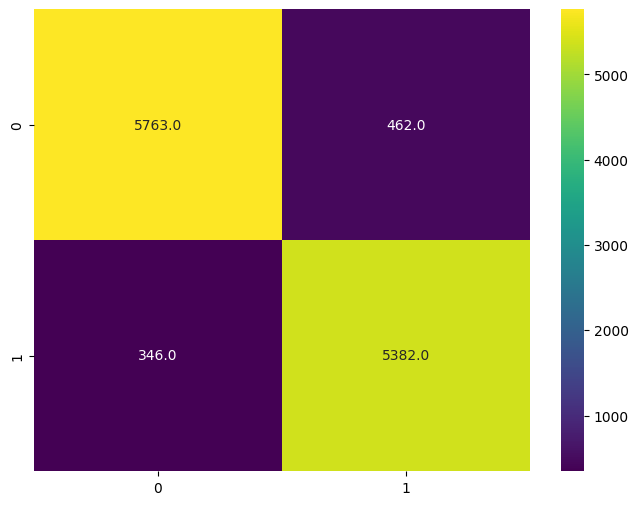

In [ ]:
#cofusion matrix of logistic regression
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
print(confuse_matrix_lr)
#ploting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f", cmap="viridis")

#### 2. Cross- Validation & Hyperparameter Tuning

Implementing Cross-validated Logistic Regression

In [ ]:
logistic = LogisticRegression()

In [ ]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9328451882845188, 0.9389640216372515, 0.9441539426898139)

In [ ]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The maximum accuracy score achieved during cross-validation is 94.42

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

the evaluation metrics I used includes accuracy, precision, recall, and F1-score. These metrics provide a comprehensive view of the model's performance, considering both the positive and negative classes, and are common metrics for classification problems.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
models=[clf,random_forest,log_reg]
name=['Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','Logistic Regression']

In [ ]:
def accuracy_of_each_model(model, x_train, x_test, y_train, y_test):
    # Predicting train and test data
    y_train_preds = model.predict(x_train)
    y_test_preds = model.predict(x_test)

    # Lists to store scores for each metric
    train_scores = []
    test_scores = []
    metrics = ['Accuracy_Score', 'Precision_Score', 'Recall_Score']

    # Get the accuracy scores
    train_accuracy_score = accuracy_score(y_train, y_train_preds)
    test_accuracy_score = accuracy_score(y_test, y_test_preds)

    train_scores.append(train_accuracy_score)
    test_scores.append(test_accuracy_score)

    # Get the precision scores
    train_precision_score = precision_score(y_train, y_train_preds)
    test_precision_score = precision_score(y_test, y_test_preds)

    train_scores.append(train_precision_score)
    test_scores.append(test_precision_score)

    # Get the recall scores
    train_recall_score = recall_score(y_train, y_train_preds)
    test_recall_score = recall_score(y_test, y_test_preds)

    train_scores.append(train_recall_score)
    test_scores.append(test_recall_score)

    return train_scores, test_scores, metrics

for model_idx, model in enumerate(models):
    train_score_, test_score_, metrics_ = accuracy_of_each_model(model, x_train, x_test, y_train, y_test)

    print("-*-*-"*3 + f"{name[model_idx]}" + "-*-*-"*4)
    print("")
    print(pd.DataFrame(data={'Metrics': metrics_, 'Train_Score': train_score_, 'Test_Score': test_score_}))
    print("")


-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

           Metrics  Train_Score  Test_Score
0   Accuracy_Score     0.974544    0.915837
1  Precision_Score     0.977952    0.916255
2     Recall_Score     0.968373    0.907297

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

           Metrics  Train_Score  Test_Score
0   Accuracy_Score     0.974502    0.928972
1  Precision_Score     0.970766    0.926114
2     Recall_Score     0.975840    0.925628

-*-*--*-*--*-*-Logistic Regression-*-*--*-*--*-*--*-*-

           Metrics  Train_Score  Test_Score
0   Accuracy_Score     0.938985    0.932402
1  Precision_Score     0.928165    0.920945
2     Recall_Score     0.945003    0.939595



the *Logistic Regression model* has achieved a competitive test accuracy and can be a reasonable choice, especially if interpretability is important. However, if maximizing accuracy is the primary goal and interpretability is less critical, the Random Forest model may be preferred.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

*Random Forest*
It is an ensemble learning technique that combines multiple decision trees to make predictions. One of the benefits of Random Forest is its ability to assess feature importance, which helps understand the contribution of each feature to the model's predictions.

Customers perception of "value for money" is primarily influenced by the overall value they receive for their money, followed by factors like cabin service, ground service, and seat comfort. Other factors like the type of cabin or traveler class have negligible influence on this aspect.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

the three models that were used for classification problemare:



1.  Decision Tree
2.  Random Forest, and
3.  Logistic Regression


For Decision Tree:

Hyperparameter tuning was performed to fine-tune the model. The priority for classification metrics was Recall, followed by Accuracy and ROC AUC.
The Decision Tree model achieved competitive results in terms of accuracy.
Interpretability is a notable advantage of this model.
Key features for prediction included overall rating and Value for money.



For Random Forest:

We applied hyperparameter tuning to optimize the model's performance.
The priority for classification metrics remained the same.
Random Forest exhibited robust performance and accuracy above 90%.
It combines multiple decision trees to handle complex relationships in the data.
Important features for predictions were the overall rating and Value for money.


For Logistic Regression:

Like the other models, hyperparameter tuning was conducted.
Similar priority for classification metrics was applied.
Logistic Regression achieved an accuracy of over 90% and was chosen as the best-performing model.
The most important features for prediction were the overall rating and Value for money.
This model can help airlines identify influential passengers for revenue growth.


In conclusion, all three models achieved high accuracy, and the choice among them depends on factors like interpretability and specific business goals. Logistic Regression stood out as the best model overall, but Decision Tree and Random Forest also provided valuable insights and competitive performance. Airlines can use these models to identify influential passengers and improve their services accordingly.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***